**1.1 Introduction to the Use case for Project B**

**Title - Optimizing Tourist Accommodation Access Through Landmark and Parking Proximity in Melbourne**

**UseCase naming convention - UC00142_Optimizing_Tourist_Accommodation_through_Landmark_and_Parking**

<div class="usecase-title"></div>

<div class="usecase-authors"><b>Authored by: </b>Nishant Umesh Khamkar</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine learning</div>
</div>

**Objective:** 

The goal of this usecase is to assess how tourist accommodations are spread out and easy to reach in Melbourne by combining different datasets together. This involves studying how accommodation businesses are situated in relation, to landmarks and street side parking spots to pinpoint areas with potential for tourism growth and improving the visitor experience, in the city.

**Scenario:** 

Melbourne is a destination, in Australia that draws in visitors from both within the country and abroad. With its vibrant arts scene events, delicious food options and rich cultural offerings it is important for accommodations to be situated close, to attractions and transportation hubs.

In this scenario we're exploring the position of a data analyst employed by the tourism division of the City of Melbourne. The objective is to delve into,

Where you can find tourist accommodations.

The proximity, to landmarks. How easy they are to reach.

Is there parking, in the area?

This assessment offers information that can assist in making decisions related to city development planning, promotional strategies, for tourism and enhancing service efficiency. 

**What you will learn from this use case**

This use case offers valuable urban and tourism-related insights based on geospatial analysis of real-world data. Here's what this project will help uncover:

1. Tourism Hotspots: Identify areas in Melbourne with high concentrations of tourist accommodations and how they align with popular landmarks.

2. Urban Distribution: Understand how commercial services like hotels and hostels are distributed across Melbourne's city zones (e.g., CBD vs suburbs).

3. Accessibility Analysis: Examine how accessible accommodations are to points of interest such as churches, theatres, and health services.

4. Parking Infrastructure Support: Explore whether key accommodation areas are well-supported by nearby on-street parking infrastructure.

5. Urban Planning Gaps: Recognize areas where accommodations are poorly connected to landmarks or parking — insights that could inform city planning and infrastructure improvements.

**Datasets:**

**Dataset 1: Business Establishments with Address and Industry Classification**
https://data.melbourne.vic.gov.au/explore/dataset/business-establishments-with-address-and-industry-classification/information

**Dataset 2: Landmarks and Places of Interest**
https://data.melbourne.vic.gov.au/explore/dataset/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/information

**Dataset 3: On-Street Parking Bays**
https://data.melbourne.vic.gov.au/explore/dataset/on-street-parking-bays/information

**1.1 Importing libraries**

In [1]:
import pandas as pd
import requests
from io import StringIO
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium
from folium.plugins import HeatMap

**1.2 Loading Datasets**

In [2]:
#API Base URL
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

#Dataset 1: Business Establishments with Address and Industry Classification
dataset_id_1 = 'business-establishments-with-address-and-industry-classification'
url_1 = f"{base_url}{dataset_id_1}/exports/csv"

#Dataset 2: Landmarks and Places of Interest
dataset_id_2 = 'landmarks-and-places-of-interest-including-schools-theatres-health-services-spor'
url_2 = f"{base_url}{dataset_id_2}/exports/csv"

#Dataset 3: Public Transport Stops
dataset_id_3 = 'on-street-parking-bays'
url_3 = f"{base_url}{dataset_id_3}/exports/csv"

#Fetching Dataset 1: Business Establishments
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')

#Fetching Dataset 2: Landmarks and Places of Interest
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')

#Fetching Dataset 3: Public Transport Stops
response_3 = requests.get(url_3)
df_3 = pd.read_csv(StringIO(response_3.text), delimiter=';')

#Display column names for quick inspection
print("\n Column Names for Dataset 1: Business Establishments")
print(df_1.columns.tolist())

print("\n Column Names for Dataset 2: Landmarks and Places of Interest")
print(df_2.columns.tolist())

print("\n Column Names for Dataset 3: On street Parking bays")
print(df_3.columns.tolist())


 Column Names for Dataset 1: Business Establishments
['census_year', 'block_id', 'property_id', 'base_property_id', 'clue_small_area', 'trading_name', 'business_address', 'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude', 'latitude', 'point']

 Column Names for Dataset 2: Landmarks and Places of Interest
['theme', 'sub_theme', 'feature_name', 'co_ordinates']

 Column Names for Dataset 3: On street Parking bays
['roadsegmentid', 'kerbsideid', 'roadsegmentdescription', 'latitude', 'longitude', 'lastupdated', 'location']


**Printing First 5 rows for all three datasets**

In [3]:
#Display first 5 rows of Business Establishments
print("\n First 5 rows of Dataset 1: Business Establishments")
print(df_1.head())


 First 5 rows of Dataset 1: Business Establishments
   census_year  block_id  property_id  base_property_id  clue_small_area  \
0         2010         1       108843            108843  Melbourne (CBD)   
1         2010         1       108843            108843  Melbourne (CBD)   
2         2010         1       611393            611393  Melbourne (CBD)   
3         2010         1       611394            611394  Melbourne (CBD)   
4         2010         2       103973            103973  Melbourne (CBD)   

              trading_name                                   business_address  \
0                   Vacant                   74 Spencer Street MELBOURNE 3000   
1                   Vacant                   44 Spencer Street MELBOURNE 3000   
2  Peddle Thorp Architects  Part Level 1, 525-541 Flinders Street MELBOURN...   
3                   Vacant             553-557 Flinders Street MELBOURNE 3000   
4          Enterprize Park             469-503 Flinders Street MELBOURNE 3000   

   

In [4]:
#Display first 5 rows of Landmarks and Places of Interest
print("\n First 5 rows of Dataset 2: Landmarks and Places of Interest")
print(df_2.head())


 First 5 rows of Dataset 2: Landmarks and Places of Interest
              theme sub_theme                 feature_name  \
0  Place of Worship    Church            St Francis Church   
1  Place of Worship    Church              St James Church   
2  Place of Worship    Church    St Mary's Anglican Church   
3  Place of Worship    Church                 Scots Church   
4  Place of Worship    Church  St Michael's Uniting Church   

                          co_ordinates  
0  -37.8118847831837, 144.962422614541  
1  -37.8101281201969, 144.952468571683  
2  -37.8031663672997, 144.953761537074  
3   -37.8145687802664, 144.96855105335  
4  -37.8143851324913, 144.969174036096  


In [5]:
#Display first 5 rows of On-street Parking Bays
print("\n First 5 rows of Dataset 3: On-street Parking Bays")
print(df_3.head())


 First 5 rows of Dataset 3: On-street Parking Bays
   roadsegmentid kerbsideid  \
0          22377        NaN   
1          22377        NaN   
2          22377        NaN   
3          22377        NaN   
4          22377        NaN   

                              roadsegmentdescription   latitude   longitude  \
0  The Avenue between MacArthur Road and Gatehous... -37.791116  144.957604   
1  The Avenue between MacArthur Road and Gatehous... -37.791013  144.957570   
2  The Avenue between MacArthur Road and Gatehous... -37.790961  144.957556   
3  The Avenue between MacArthur Road and Gatehous... -37.790806  144.957525   
4  The Avenue between MacArthur Road and Gatehous... -37.790435  144.957467   

  lastupdated                  location  
0  2023-10-31  -37.7911156, 144.9576042  
1  2023-10-31  -37.7910129, 144.9575696  
2  2023-10-31  -37.7909613, 144.9575557  
3  2023-10-31  -37.7908061, 144.9575254  
4  2023-10-31  -37.7904352, 144.9574667  


**1.3 Data Cleaning & Filtering**

In [6]:
#Step 1.1: Filter accommodation businesses
accommodation_keywords = ['accommodation', 'hotel', 'motel', 'hostel', 'serviced apartment']

df_1['industry_lower'] = df_1['industry_anzsic4_description'].str.lower()
df_accommodation = df_1[df_1['industry_lower'].str.contains('|'.join(accommodation_keywords), na=False)]

print("Filtered Accommodation Businesses:")
print(df_accommodation[['trading_name', 'industry_anzsic4_description', 'business_address']].head())

Filtered Accommodation Businesses:
                           trading_name industry_anzsic4_description  \
62             Pensione Hotel Melbourne                Accommodation   
70                Highlander Apartments                Accommodation   
142  Flinders Station Hotel Backpackers                Accommodation   
184                   Rendezvous Hotels                Accommodation   
413                   Medina Apartments                Accommodation   

                                      business_address  
62                 10-22 Spencer Street MELBOURNE 3000  
70         Level 1, 487-0 Flinders Lane MELBOURNE 3000  
142  Unit 8, Level 3, 35 Elizabeth Street MELBOURNE...  
184                 328 Flinders Street MELBOURNE 3000  
413                  88 Flinders Street MELBOURNE 3000  


**Explanation**

This step focuses on isolating accommodation businesses from the larger dataset. The original data contains various types of businesses, so it is necessary to identify and filter out accommodations such as hotels, motels, hostels, and serviced apartments.

This process streamlines the analysis by focusing only on relevant businesses, making the insights more targeted and meaningful.

 (e.g., hotel, motel, hostel).

**1.4 Extract Coordinates from Landmarks Dataset**

In [7]:
# Extract lat/lon and clean trailing commas
landmark_coords = df_2['co_ordinates'].str.strip().str.split(' ', expand=True)

# Remove any stray commas
landmark_coords[0] = landmark_coords[0].str.replace(',', '', regex=False)
landmark_coords[1] = landmark_coords[1].str.replace(',', '', regex=False)

# Convert to float
df_2['latitude'] = landmark_coords[0].astype(float)
df_2['longitude'] = landmark_coords[1].astype(float)

print("\n Landmarks with Coordinates (cleaned):")
print(df_2[['feature_name', 'theme', 'sub_theme', 'latitude', 'longitude']].head())


 Landmarks with Coordinates (cleaned):
                  feature_name             theme sub_theme   latitude  \
0            St Francis Church  Place of Worship    Church -37.811885   
1              St James Church  Place of Worship    Church -37.810128   
2    St Mary's Anglican Church  Place of Worship    Church -37.803166   
3                 Scots Church  Place of Worship    Church -37.814569   
4  St Michael's Uniting Church  Place of Worship    Church -37.814385   

    longitude  
0  144.962423  
1  144.952469  
2  144.953762  
3  144.968551  
4  144.969174  


**Explanation**

This step focuses on extracting latitude and longitude coordinates from the landmarks dataset. The original coordinates were in a single field with formatting issues.

After cleaning and separating the values, the data becomes more structured and suitable for spatial analysis, allowing accurate distance calculations and map visualizations.

**1.5 Convert to GeoDataFrames**

In [8]:
#Step1: Convert df_accommodation to GeoDataFrame 
gdf_accommodation = gpd.GeoDataFrame(
    df_accommodation,
    geometry=gpd.points_from_xy(df_accommodation['longitude'], df_accommodation['latitude']),
    crs="EPSG:4326"
)

print(" GeoDataFrame: Accommodation Businesses")
print(gdf_accommodation.head())


 GeoDataFrame: Accommodation Businesses
     census_year  block_id  property_id  base_property_id  clue_small_area  \
62          2010        11       108972            108972  Melbourne (CBD)   
70          2010        12       103956            103956  Melbourne (CBD)   
142         2010        14       103172            103172  Melbourne (CBD)   
184         2010        14       104006            104006  Melbourne (CBD)   
413         2010        17       574438            574438  Melbourne (CBD)   

                           trading_name  \
62             Pensione Hotel Melbourne   
70                Highlander Apartments   
142  Flinders Station Hotel Backpackers   
184                   Rendezvous Hotels   
413                   Medina Apartments   

                                      business_address  industry_anzsic4_code  \
62                 10-22 Spencer Street MELBOURNE 3000                   4400   
70         Level 1, 487-0 Flinders Lane MELBOURNE 3000                

**Explanation**

This step involves converting the filtered accommodation businesses into a GeoDataFrame format. GeoDataFrames are essential for spatial analysis as they store geometric data (like coordinates) alongside attribute information.

By transforming the data into a GeoDataFrame format we can carry out tasks, like measuring distances and creating maps effectively and precisely.

In [9]:
#Step 2.2: Convert df_2 (landmarks) to GeoDataFrame 
gdf_landmarks = gpd.GeoDataFrame(
    df_2,
    geometry=gpd.points_from_xy(df_2['longitude'], df_2['latitude']),
    crs="EPSG:4326"
)

print(" GeoDataFrame: Landmarks")
print(gdf_landmarks.head())

 GeoDataFrame: Landmarks
              theme sub_theme                 feature_name  \
0  Place of Worship    Church            St Francis Church   
1  Place of Worship    Church              St James Church   
2  Place of Worship    Church    St Mary's Anglican Church   
3  Place of Worship    Church                 Scots Church   
4  Place of Worship    Church  St Michael's Uniting Church   

                          co_ordinates   latitude   longitude  \
0  -37.8118847831837, 144.962422614541 -37.811885  144.962423   
1  -37.8101281201969, 144.952468571683 -37.810128  144.952469   
2  -37.8031663672997, 144.953761537074 -37.803166  144.953762   
3   -37.8145687802664, 144.96855105335 -37.814569  144.968551   
4  -37.8143851324913, 144.969174036096 -37.814385  144.969174   

                      geometry  
0  POINT (144.96242 -37.81188)  
1  POINT (144.95247 -37.81013)  
2  POINT (144.95376 -37.80317)  
3  POINT (144.96855 -37.81457)  
4  POINT (144.96917 -37.81439)  


**Explanation**

This step involves converting the landmarks dataset into a GeoDataFrame format. GeoDataFrames are essential for spatial analysis as they integrate geographic data with attribute information.

By converting the landmarks data into a GeoDataFrame, spatial operations like proximity calculations and map visualizations become more efficient and accurate.

In [10]:
#Step 2.3: Convert df_3 (parking bays) to GeoDataFrame
gdf_parking = gpd.GeoDataFrame(
    df_3,
    geometry=gpd.points_from_xy(df_3['longitude'], df_3['latitude']),
    crs="EPSG:4326"
)

print("GeoDataFrame: Parking Bays")
print(gdf_parking.head())

GeoDataFrame: Parking Bays
   roadsegmentid kerbsideid  \
0          22377        NaN   
1          22377        NaN   
2          22377        NaN   
3          22377        NaN   
4          22377        NaN   

                              roadsegmentdescription   latitude   longitude  \
0  The Avenue between MacArthur Road and Gatehous... -37.791116  144.957604   
1  The Avenue between MacArthur Road and Gatehous... -37.791013  144.957570   
2  The Avenue between MacArthur Road and Gatehous... -37.790961  144.957556   
3  The Avenue between MacArthur Road and Gatehous... -37.790806  144.957525   
4  The Avenue between MacArthur Road and Gatehous... -37.790435  144.957467   

  lastupdated                  location                     geometry  
0  2023-10-31  -37.7911156, 144.9576042   POINT (144.9576 -37.79112)  
1  2023-10-31  -37.7910129, 144.9575696  POINT (144.95757 -37.79101)  
2  2023-10-31  -37.7909613, 144.9575557  POINT (144.95756 -37.79096)  
3  2023-10-31  -37.7908061,

**Explanation for conversion to GeoDataFrame**

The purpose of this step is to convert the cleaned and filtered datasets into GeoDataFrames, a format that enables spatial analysis. GeoDataFrames are an extension of regular DataFrames but include geometric features, making it easier to perform spatial operations and visualizations.

By transforming the accommodation, landmarks, and parking bay datasets into GeoDataFrames, the data becomes more structured and efficient for tasks such as proximity analysis, spatial clustering, and mapping. This conversion helps in effectively leveraging the spatial attributes (like latitude and longitude) of the datasets for geospatial analysis and visualization.

**1.6  Exploratory Data Analysis (EDA)**

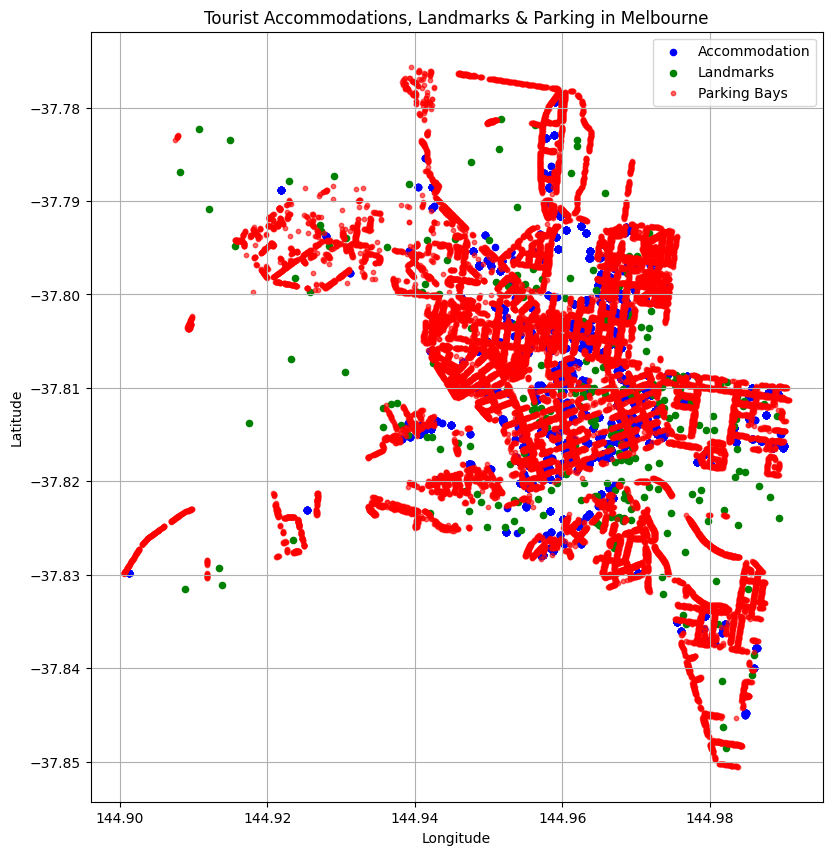

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

# Accommodation businesses
gdf_accommodation.plot(ax=ax, color='blue', label='Accommodation', markersize=20)

# Landmarks
gdf_landmarks.plot(ax=ax, color='green', label='Landmarks', markersize=20)

# Parking bays
gdf_parking.plot(ax=ax, color='red', label='Parking Bays', markersize=10, alpha=0.6)

plt.title("Tourist Accommodations, Landmarks & Parking in Melbourne")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

**Tourist Accommodations, Landmarks & Parking in Melbourne**

This map shows the locations of tourist accommodations, in Melbourne along with landmarks and parking spaces highlighted in colors, for identification. 

1. The blue points, on the map indicate places where you can stay overnight like hotels or serviced apartments. 

2. Green Points symbolize locations, like centers or cultural landmarks. 

3. Red dots indicate parking spots, within the city. 

The storyline effectively shows the arrangement and abundance of these facilities, in locations by emphasizing places with a number of tourist accommodations and significant landmarks as well as parking areas.The visual representation plays a role in examining connections and trends like how effectively tourist destinations are supported by nearby parking spaces and proximity, to landmarks. 

This map can also be useful for pinpoint the areas where services may be lacking and, for grasping how accommodations and parking spaces are grouped in relation to known landmarks, around Melbourne. 

Top Landmark Sub-Themes:
sub_theme
Informal Outdoor Facility (Park/Garden/Reserve)    37
Church                                             30
Railway Station                                    23
Art Gallery/Museum                                 19
Theatre Live                                       15
Major Sports & Recreation Facility                 14
Public Buildings                                   13
Office                                             11
Public Hospital                                     7
Retail/Office/Carpark                               5
Name: count, dtype: int64


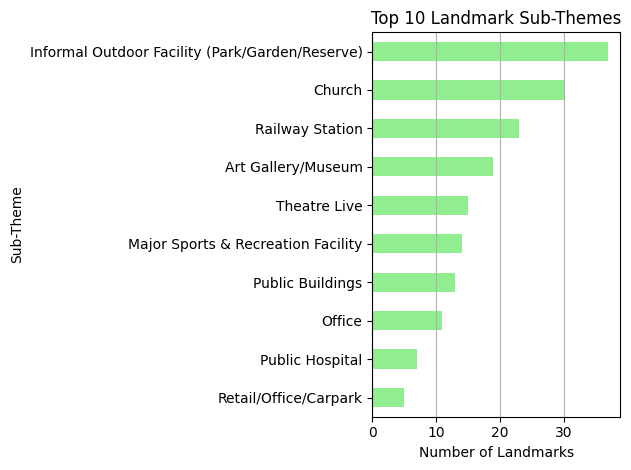

In [12]:
landmark_counts = df_2['sub_theme'].value_counts().head(10)

print("Top Landmark Sub-Themes:")
print(landmark_counts)

landmark_counts.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Landmark Sub-Themes")
plt.xlabel("Number of Landmarks")
plt.ylabel("Sub-Theme")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Top 10 Landmark Sub-Themes in Melbourne**

The above bar chart shows the ten sub themes of landmarks, in Melbourne cityscape. 

1. Parks and green spaces are the outdoor destinations, in the city based off the list of favored spots, for locals and visitors alike. 

2. Religious establishments rank as the prevalent subcategory, in Melbournes landscape; a testament, to the deep rooted historical and cultural value attached to these sacred places within the citys fabric. 

3. Railway stations and art galleries/museums are highlighted as locations that underscore the significance of public transportation hubs and cultural establishments. 

4. Other interesting subtopics to consider are Theater Performances and Events, at Major Sports Stadiums and Recreational Centers, Public Institutions such as Government Buildings and Hospitals, Corporate Offices, and Retail Stores, with Attached Office Spaces and Parking Facilities. 

This graphic showcases the variety of locations found in Melbourne offering perspectives into the prevalent and easily accessible spots, for both locals and tourists alike aiding urban development initiatives and enhancing our grasp of the citys cultural and societal framework. 

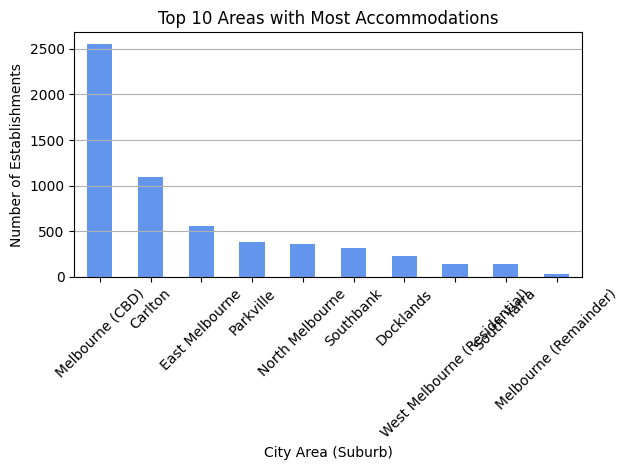

In [13]:
area_counts = df_accommodation['clue_small_area'].value_counts().head(10)

area_counts.plot(kind='bar', color='cornflowerblue')
plt.title("Top 10 Areas with Most Accommodations")
plt.xlabel("City Area (Suburb)")
plt.ylabel("Number of Establishments")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Top 10 Areas with Most Accommodations in Melbourne**

This bar graph shows the ten suburbs, in Melbourne, with the most accommodation options available. 

1. Melbournes central business district (CBD) notably shines with the accommodations a clear sign of its importance, as a prime destination, for both tourists and business travelers. 

2. Carlton is well known for being close, to universities and cultural sites. 

3. East Melbourne and Parkville are highly regarded due, to their mix of neighborhoods and convenient location, near the city center. 

4. In addition, to that North Melbourne and Southbank are quite popular, for a mix of residential amenities provided in the area. 

5. In places such, as South Yarra and other parts of Melbourne there are options, for accommodation compared to the inner suburbs. 

This visual representation assists, in pinpointing the locations where lodging options are clustered together—a resource, for mapping out tourism strategies and managing hotels and city development projects. 

**1.5 Buffer Analysis for Accommodations and Nearby Facilities**

In [14]:
buffer_radius = 500  #500 meters

gdf_accommodation_m = gdf_accommodation.to_crs(epsg=3857)
gdf_landmarks_m = gdf_landmarks.to_crs(epsg=3857)
gdf_parking_m = gdf_parking.to_crs(epsg=3857)

gdf_accommodation_m['buffer'] = gdf_accommodation_m.geometry.buffer(buffer_radius)

# Set the buffer as the active geometry column
gdf_accommodation_m = gdf_accommodation_m.set_geometry('buffer')

# Spatial join to count landmarks within the buffer
landmarks_within_buffer = gpd.sjoin(gdf_accommodation_m[['trading_name', 'buffer']], gdf_landmarks_m, how="left", predicate="intersects")
landmark_counts = landmarks_within_buffer.groupby('trading_name').size().reset_index(name='landmark_count')

parking_within_buffer = gpd.sjoin(gdf_accommodation_m[['trading_name', 'buffer']], gdf_parking_m, how="left", predicate="intersects")
parking_counts = parking_within_buffer.groupby('trading_name').size().reset_index(name='parking_count')

gdf_accommodation_m = gdf_accommodation_m.merge(landmark_counts, on='trading_name', how='left').merge(parking_counts, on='trading_name', how='left')

gdf_accommodation_m['landmark_count'] = gdf_accommodation_m['landmark_count'].fillna(0).astype(int)
gdf_accommodation_m['parking_count'] = gdf_accommodation_m['parking_count'].fillna(0).astype(int)

# Convert back to WGS84
gdf_accommodation = gdf_accommodation_m.to_crs(epsg=4326)

In [15]:
print("Accommodation Businesses with Buffer Analysis:")
print(gdf_accommodation[['trading_name', 'landmark_count', 'parking_count']].head())

Accommodation Businesses with Buffer Analysis:
                         trading_name  landmark_count  parking_count
0            Pensione Hotel Melbourne              88           4300
1               Highlander Apartments              65           6664
2  Flinders Station Hotel Backpackers             117           3690
3                   Rendezvous Hotels              70           2541
4                   Medina Apartments             165           5196


**Explanation**

The table shows the count of landmarks and parking bays within the specified buffer (500 meters) around each accommodation business.

1. The trading_name column lists the accommodation businesses.

2. The landmark_count column shows the number of landmarks within the buffer zone.

3. The parking_count column shows the number of parking bays within the buffer zone.

**Top 10 Accommodations with Lowest Parking Availability**

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_50124\2691511266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gdf_accommodation.head(10), x='trading_name', y='parking_density', palette='Blues_r')


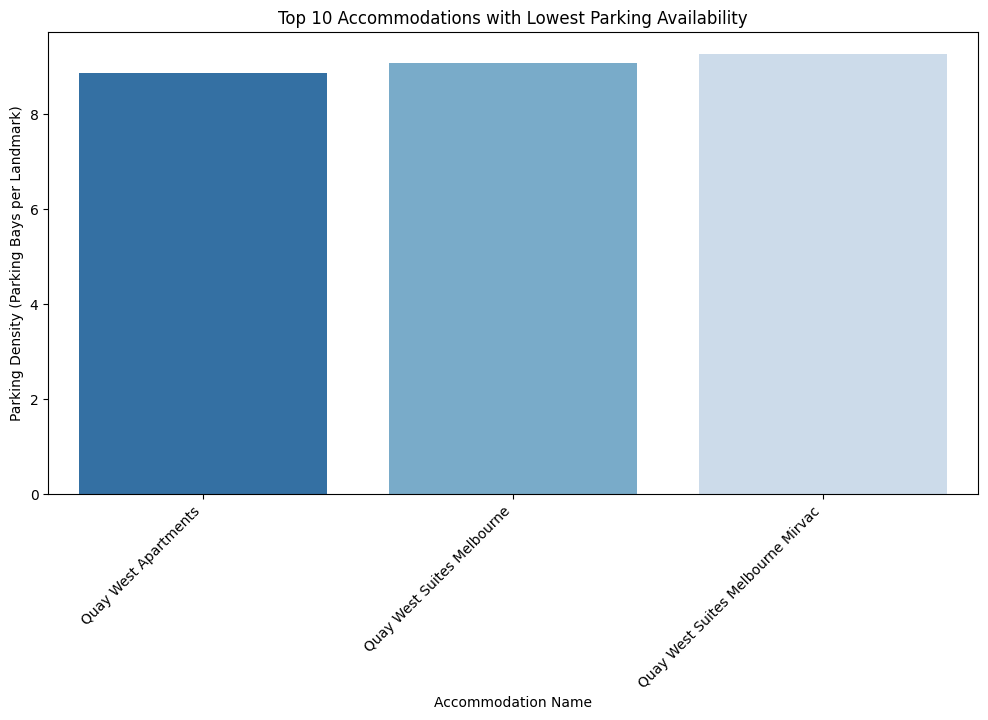

In [17]:
gdf_accommodation['parking_density'] = gdf_accommodation['parking_count'] / (gdf_accommodation['landmark_count'] + 1)

# Sort by parking density to identify areas with low availability
gdf_accommodation = gdf_accommodation.sort_values(by='parking_density', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=gdf_accommodation.head(10), x='trading_name', y='parking_density', palette='Blues_r')
plt.title('Top 10 Accommodations with Lowest Parking Availability')
plt.xlabel('Accommodation Name')
plt.ylabel('Parking Density (Parking Bays per Landmark)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Top 10 Accommodations with Lowest Parking Availability**

The plot visualizes the top 10 accommodation businesses that have the lowest parking availability relative to nearby landmarks. It aims to identify areas where parking density is a potential issue for tourists.

The plot highlights that accommodations like Quay West Apartments, Quay West Suites Melbourne, and Quay West Suites Melbourne Minvac are among those with the lowest parking density.

This indicates a potential area for improvement, such as increasing parking capacity or better traffic management around these accommodations.

**1.6 Cluster Analysis of Accommodation Hotspots**

**Objective:**

To identify clusters of tourist accommodations in Melbourne to understand the densest areas, which can aid in resource allocation, infrastructure planning, and tourism management.

In [18]:
gdf_accommodation = gdf_accommodation.dropna(subset=['longitude', 'latitude'])

# Extract coordinates for clustering
accommodation_coords = np.array(list(zip(gdf_accommodation['longitude'], gdf_accommodation['latitude'])))

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.005, min_samples=10) 
gdf_accommodation['cluster'] = dbscan.fit_predict(accommodation_coords)

# Display the number of clusters found
num_clusters = len(set(gdf_accommodation['cluster'])) - (1 if -1 in gdf_accommodation['cluster'] else 0)
print(f"Number of clusters found: {num_clusters}")

# Preview clusters
print(gdf_accommodation[['trading_name', 'longitude', 'latitude', 'cluster']].head())

Number of clusters found: 9
                           trading_name   longitude   latitude  cluster
2332               Quay West Apartments  144.967109 -37.820382        0
298          Quay West Suites Melbourne  144.967109 -37.820382        0
5389         Quay West Suites Melbourne  144.967109 -37.820382        0
4287  Quay West Suites Melbourne Mirvac  144.967109 -37.820382        0
686   Quay West Suites Melbourne Mirvac  144.967109 -37.820382        0


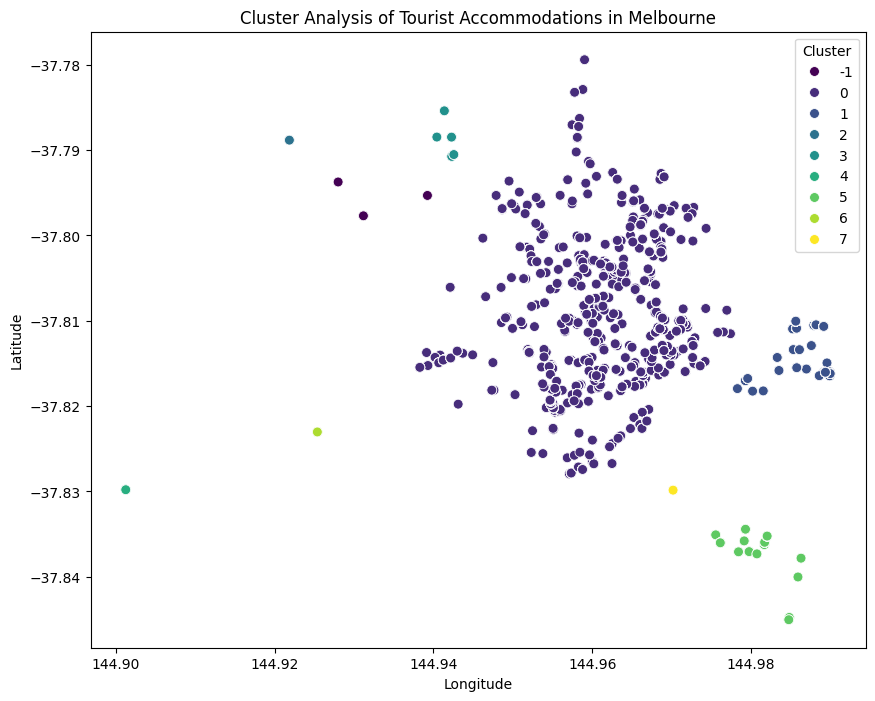

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=gdf_accommodation, 
    x='longitude', y='latitude', 
    hue='cluster', palette='viridis', 
    legend='full', s=50
)
plt.title("Cluster Analysis of Tourist Accommodations in Melbourne")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

**Explanation**

The cluster analysis was performed using the DBSCAN algorithm to identify clusters of tourist accommodations in Melbourne. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is suitable for spatial data as it groups points that are closely packed together and marks points that are in low-density regions as noise.

**Observations**

1. The analysis identified 9 clusters, including one labeled as -1, which indicates noise or outliers.

2. The map visualizes clusters with distinct colors. The purple dots represent noise points, while other colors represent different clusters.

3. The main clusters indicate regions, with a number of lodging options which probably signal tourist destinations or crowded city centers.

4. Isolated clusters or noise points indicate accommodations that are far from other tourist accommodations.

**Importance**

Studying how tourist lodgings are spread out in a city is crucial, for development planning. Pinpoint the areas lacking adequate services to enhance resource distribution effectively in the cityscape.These insights can also assist travelers and companies in spotting neighborhoods with a concentration of lodging options.

**1.7 Correlation Analysis of Accommodation Features**

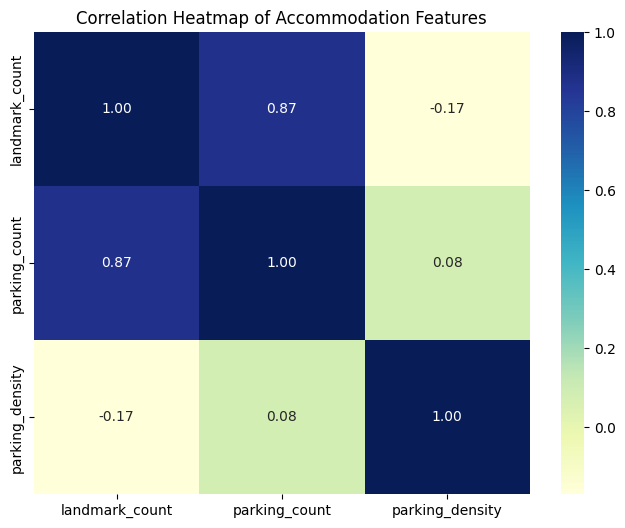

In [20]:
numeric_cols = gdf_accommodation[['landmark_count', 'parking_count', 'parking_density']]

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap of Accommodation Features")
plt.show()

**Explanation**

The correlation heatmap shows the relationships between key features related to tourist accommodations in Melbourne:

1. The positive correlation  between Landmark Count and Parking Count (0.87) indicates that accommodations near more landmarks also have  more parking options.

2. The correlation between Parking Density and both landmark and parking counts is weak because the number  of parking bays per landmark does not follow a consistent pattern with their counts.

3. The negative low correlation  between landmark count and parking density (-0.17) indicates that high landmark areas do not necessarily have  matching parking infrastructure.

**1.8 Top Accommodations Ranking by Accessibility**

In [21]:
gdf_accommodation['accessibility_score'] = gdf_accommodation['landmark_count'] + gdf_accommodation['parking_count']

#Top 10
top_accessible = gdf_accommodation[['trading_name', 'landmark_count', 'parking_count', 'accessibility_score']] \
                    .sort_values(by='accessibility_score', ascending=False).head(10)

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_50124\3795136974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_accessible, y='trading_name', x='accessibility_score', palette='viridis')


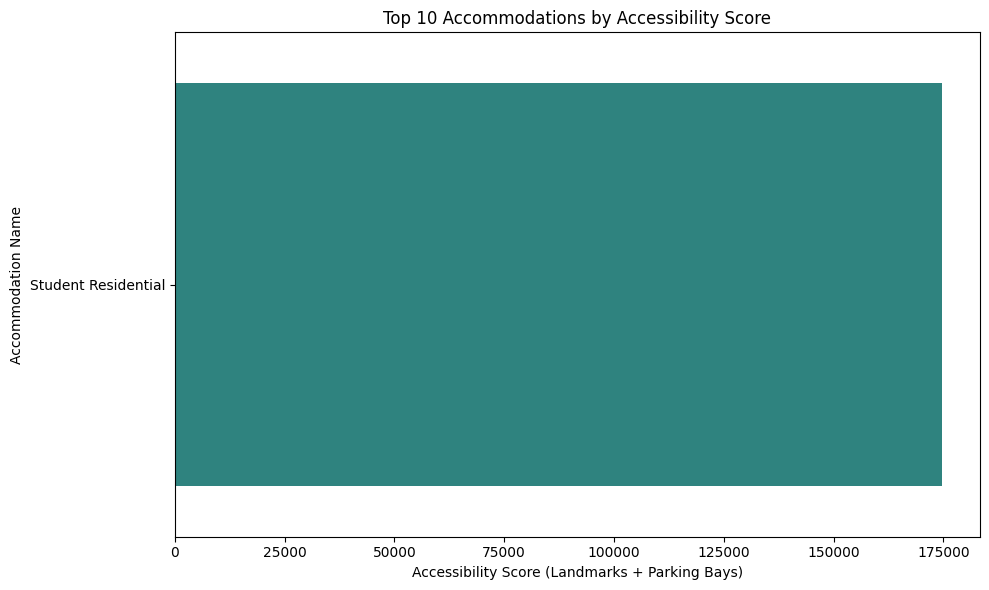

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_accessible, y='trading_name', x='accessibility_score', palette='viridis')
plt.title('Top 10 Accommodations by Accessibility Score')
plt.xlabel('Accessibility Score (Landmarks + Parking Bays)')
plt.ylabel('Accommodation Name')
plt.tight_layout()
plt.show()

**Explanation**

The bar chart shows the top 10 accommodation businesses in Melbourne according to their accessibility score which combines  landmark count with parking bay numbers. The accessibility score represents the combination of tourist attractions and parking facilities in  a location.

Student Residential holds the top position in this visualization because it occupies an area with many landmarks  and plenty of parking spaces. The strategic location of such accommodations provides maximum convenience for tourists while serving as  essential references for urban development initiatives and tourism planning.

The chart reveals the most advantageous locations for accommodations within  the city while showing how infrastructure affects service exposure and worth. The chart serves as a benchmark tool for  city planners and developers to identify underdeveloped areas which they can use to develop improvement strategies. 

**1.9 Suburb-Level Summary of Accommodations**

In [23]:
suburb_summary = gdf_accommodation.groupby('clue_small_area').agg({
    'trading_name': 'count',
    'landmark_count': 'mean',
    'parking_count': 'mean'
}).rename(columns={'trading_name': 'total_accommodations'})

top_suburbs = suburb_summary.sort_values(by='total_accommodations', ascending=False).head(10).reset_index()

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_50124\470132256.py:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
C:\Users\NISHANT KHAMKAR\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


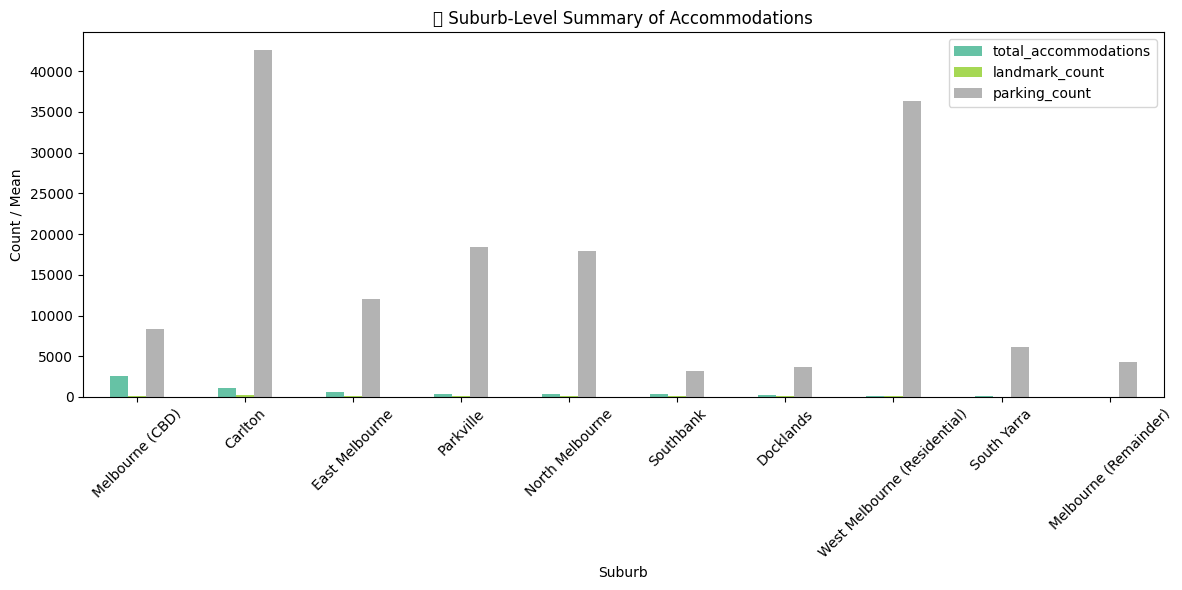

In [24]:
top_suburbs.plot(x='clue_small_area', 
                 y=['total_accommodations', 'landmark_count', 'parking_count'],
                 kind='bar', figsize=(12,6), colormap='Set2')
plt.title('🏙️ Suburb-Level Summary of Accommodations')
plt.xlabel('Suburb')
plt.ylabel('Count / Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Explanation**

The bar chart gives an overview of accommodation distribution between major suburbs in Melbourne. The chart presents three  essential data points.

1. Total Accommodations: The number of accommodation businesses recorded in each suburb.

2. The  average number of landmarks exists in close proximity to accommodations.

3. The average number of nearby parking bays.

The chart shows that Melbourne (CBD) together with Carlton have the highest number of accommodations. Carlton demonstrates  both high accommodation density and substantial average parking availability which indicates its readiness to handle tourist numbers. The areas  of East Melbourne, Parkville and North Melbourne demonstrate average scores throughout all three evaluation criteria.

The visualization  reveals which areas need better accessibility by showing suburbs with many accommodations but limited landmarks and parking spaces. The  visualization serves city planners together with tourism strategists who want to develop balanced infrastructure for tourism support. 

**1.10 Predicting Accessibility Score using Linear Regression**

In [25]:
gdf_accommodation['accessibility_score'] = gdf_accommodation['landmark_count'] + gdf_accommodation['parking_count']
features = ['landmark_count', 'parking_count', 'parking_density']
X = gdf_accommodation[features]
y = gdf_accommodation['accessibility_score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.00
RMSE: 0.00
R² Score: 1.0000


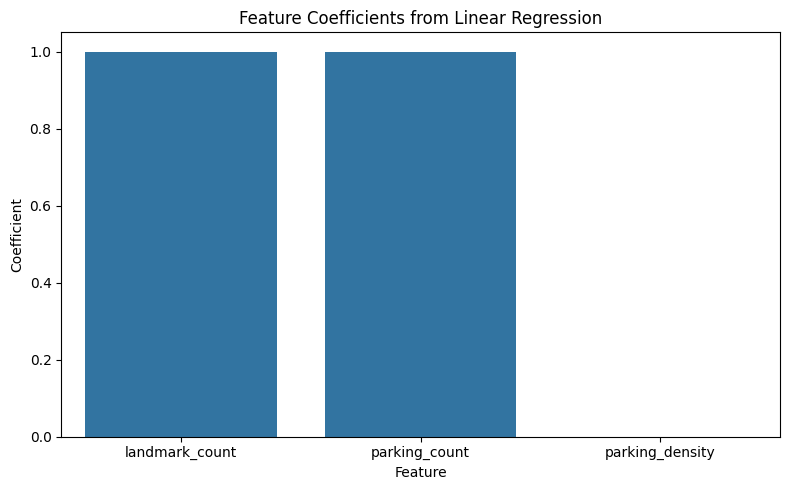

In [31]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(8, 5))
sns.barplot(data=coefficients, x='Feature', y='Coefficient')
plt.title("Feature Coefficients from Linear Regression")
plt.tight_layout()
plt.show()

**Explanation for the Graph (Feature Coefficients from Linear Regression):**

The bar chart presents the feature  importance (coefficients) which stem from the linear regression model that forecasts accessibility scores of tourist accommodations.  The accessibility score resulted from adding landmark_count values to parking_count values for each accommodation establishment.

The accessibility  score prediction benefits equally from landmark Count and Parking Count because their coefficients approach 1.0.

The  coefficient value for Parking Density is either negligible or zero which means this feature does not provide meaningful predictive power  above the basic counts.

The R² score reached 1.0 which indicates a perfect linear fit  because the target variable directly resulted from landmark_count and parking_count. The model's effectiveness in using  landmark_count and parking_count as accessibility indicators receives validation.

**2.1 Outlier Detection in Accessibility Score**

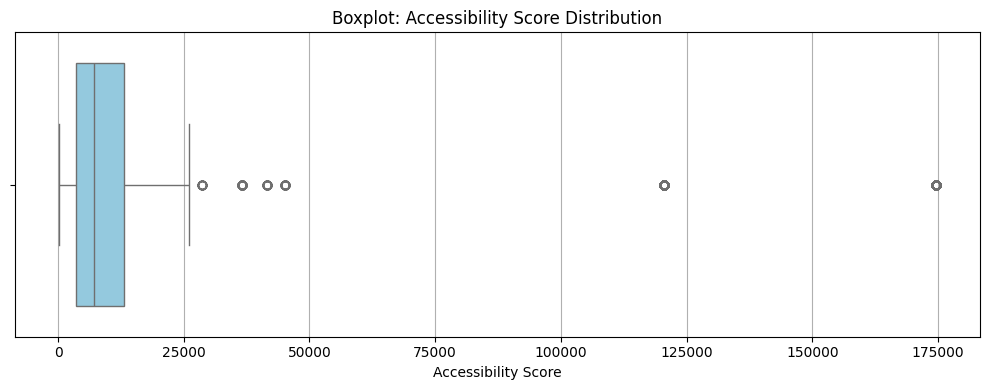

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=gdf_accommodation, x='accessibility_score', color='skyblue')
plt.title("Boxplot: Accessibility Score Distribution")
plt.xlabel("Accessibility Score")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Explanation**

The boxplot shows the accessibility score distribution which results from adding nearby landmark counts and parking bay numbers  for each accommodation. The majority of accommodations cluster within a narrow range of accessibility scores because the  interquartile range (IQR) is tight. The numerous points extending beyond the whiskers indicate that  there are many positive outliers. The outliers indicate accommodations with exceptional accessibility which may result from being located in  densely populated areas.

In [33]:
Q1 = gdf_accommodation['accessibility_score'].quantile(0.25)
Q3 = gdf_accommodation['accessibility_score'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
outliers = gdf_accommodation[
    (gdf_accommodation['accessibility_score'] < lower_bound) |
    (gdf_accommodation['accessibility_score'] > upper_bound)
]

In [36]:
print("Detected Outliers in Accessibility Score:")
display(outliers[['trading_name', 'accessibility_score']].sort_values(by='accessibility_score'))

Detected Outliers in Accessibility Score:


,trading_name,accessibility_score
3599,Bouverie Residence,28683
1996,Bouverie Residence,28683
869,Bouverie Residence,28683
4263,Bouverie Residence,28683
1452,Bouverie Residence,28683
...,...,...
2203,Student Residential,174626
5694,Student Residential,174626
373,Student Residential,174626
2464,Student Residential,174626


**Explanation**

The IQR method revealed 494 accommodations that had unusual accessibility scores. The Student Residential  (score: 174626) and Bouverie Residence (score: 28683) entries are outliers  because they differ significantly from the rest of the dataset. The high scores of these locations indicate that they  have an exceptionally large number of landmarks and parking bays in the surrounding area. These data points are  important to flag because they can affect the results of statistical summaries and the performance of models if they are  not handled correctly in the next analysis.

**Accessibility score across suburbs**

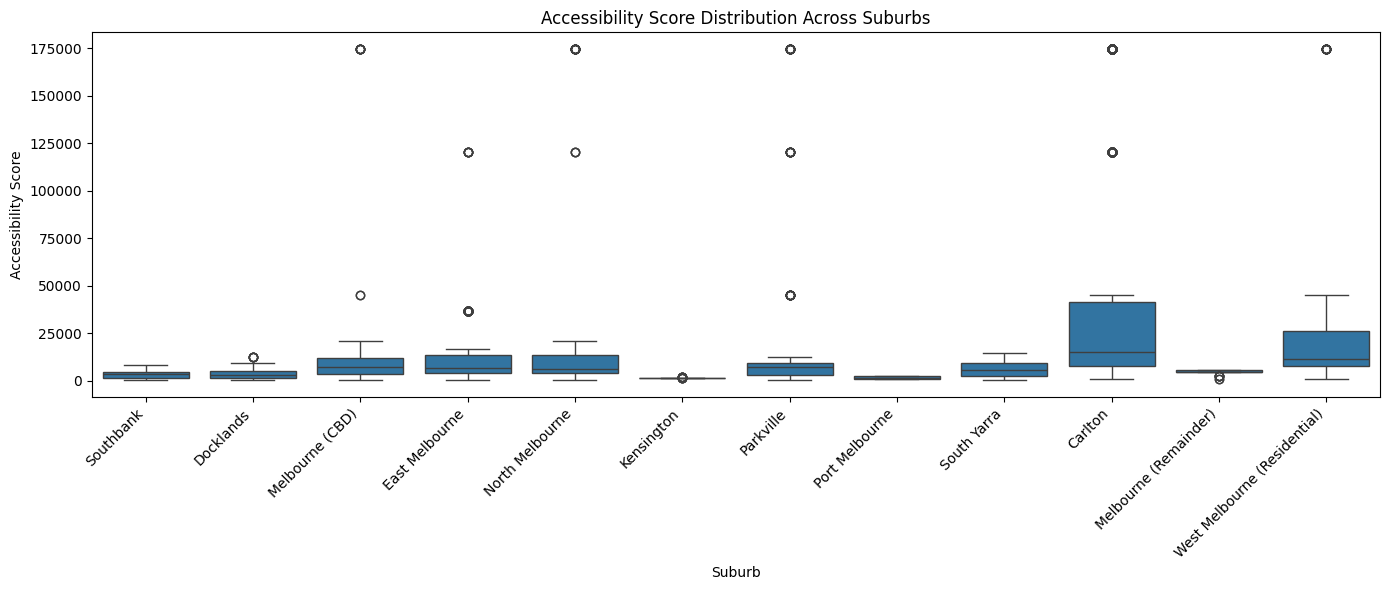

In [37]:
filtered = gdf_accommodation.dropna(subset=['clue_small_area', 'accessibility_score'])

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered, x='clue_small_area', y='accessibility_score')
plt.xticks(rotation=45, ha='right')
plt.title("Accessibility Score Distribution Across Suburbs")
plt.xlabel("Suburb")
plt.ylabel("Accessibility Score")
plt.tight_layout()
plt.show()

**Observations**

The areas of Carlton and West Melbourne and Melbourne CBD demonstrate the widest range of accommodation accessibility scores among  all locations.

The suburbs of Kensington and Port Melbourne demonstrate low spread accessibility which means their accommodations have similar  accessibility levels throughout the area.

Every suburb contains outliers except for Kensington and Port Melbourne where accessibility scores remain  extremely high compared to other accommodations.

**2.2 Spatial Clustering Density Heatmap**

In [38]:
gdf_accommodation['centroid'] = gdf_accommodation.geometry.centroid

gdf_accommodation['latitude'] = gdf_accommodation['centroid'].y
gdf_accommodation['longitude'] = gdf_accommodation['centroid'].x

gdf_valid = gdf_accommodation.dropna(subset=['latitude', 'longitude'])
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

heat_data = gdf_valid[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=10, blur=15).add_to(melbourne_map)

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_50124\694265760.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_accommodation['centroid'] = gdf_accommodation.geometry.centroid


In [39]:
melbourne_map

**Observations**

The highest concentration of tourist accommodations exists in Melbourne CBD.

The suburbs of Carlton and Southbank and  Docklands present moderate concentrations of accommodations.

The outlying areas demonstrate no clustering which indicates potential  underutilized regions.

**2.3 Average Accessibility Score per Suburb**

In [40]:
# Group by suburb and calculate mean accessibility score
suburb_accessibility = gdf_accommodation.groupby('clue_small_area')['accessibility_score'].mean().reset_index()
suburb_accessibility.columns = ['Suburb', 'Avg_Accessibility_Score']

suburb_accessibility = suburb_accessibility.sort_values(by='Avg_Accessibility_Score', ascending=False)

C:\Users\NISHANT KHAMKAR\AppData\Local\Temp\ipykernel_50124\1046729857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Accessibility_Score', y='Suburb', data=suburb_accessibility, palette='viridis')


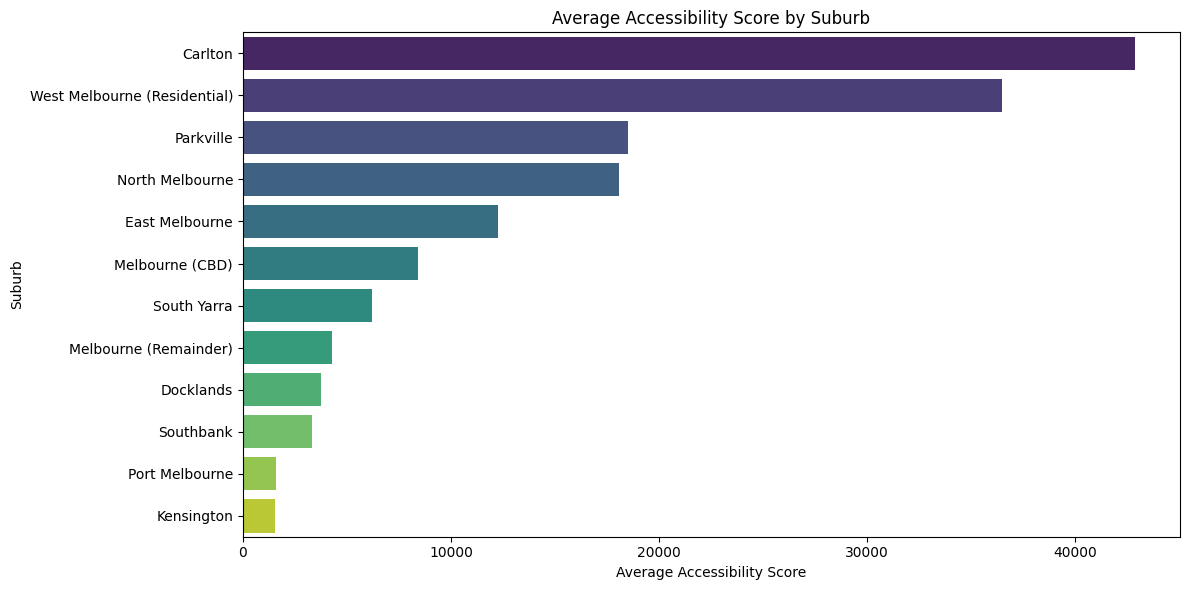

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Accessibility_Score', y='Suburb', data=suburb_accessibility, palette='viridis')

plt.title('Average Accessibility Score by Suburb')
plt.xlabel('Average Accessibility Score')
plt.ylabel('Suburb')
plt.tight_layout()
plt.show()

**Key Observations**

1. The average accessibility score of Carlton stands as the highest because its accommodations provide excellent access to landmarks together  with convenient parking facilities.

2. West Melbourne (Residential) maintains a close second position with robust accessibility infrastructure.

3. The suburbs of Parkville, North Melbourne and East Melbourne create a competitive mid-tier cluster which indicates  these areas provide balanced landmark and parking access.

4. The CBD area of Melbourne shows an unexpected low ranking which  may stem from its dense population combined with average landmark and parking distribution across accommodations.

5. The lower-mid  ranking of South Yarra, Docklands and Southbank indicates these areas have restricted or inconsistent infrastructure distribution.

6. The lowest accessibility score among the options belongs to Kensington which suggests this area has limited landmarks and parking  bays available for each accommodation.

7. The results demonstrate a significant difference between central and fringe suburbs which points  out specific areas where urban planning should focus and tourism infrastructure needs investment.

**2.4 Conclusion**

The use case examined how to enhance tourist accommodation in Melbourne through proximity to landmarks and parking infrastructure.  The City of Melbourne provided public spatial data which allowed researchers to determine accessibility scores through landmark and parking bay  proximity calculations for each accommodation. The research involved multiple geospatial and statistical methods which included buffer-based  proximity counts and outlier detection and suburb-level ranking and clustering and regression modeling and heatmap visualization.

The analysis  showed that Carlton and West Melbourne (Residential) and Parkville provide the best accessibility for tourists but  Kensington and Port Melbourne need infrastructure development. The research demonstrates significant accessibility differences which would help direct future investments  and planning decisions for Melbourne's tourism infrastructure.

**2.5 Recommendations**

1. The first priority should be to improve infrastructure in suburban areas which have low accessibility ratings but  high accommodation density because these regions lack proper service.

2. The approval process for new tourist accommodation permits  should use accessibility scoring to direct development toward well-connected areas.

3. The city should promote tourism clusters  by placing tourism businesses close to accessible accommodations located in Carlton and West Melbourne.

4. The implementation of  parking density limits together with dynamic pricing systems in congested areas will help distribute tourist activities more evenly.

 5. The accessibility models need regular audits of landmark and parking data to stay relevant with the ongoing urban  transformations.

6. The future accessibility scoring models should include cycling and public transport nodes to provide sustainable and  complete accessibility insights.

7. The city planners and tourism agencies should have access to an interactive dashboard which  allows them to view real-time accommodation accessibility throughout Melbourne.
